# Dirac Notation Implementation - Test

## Set up the environment

In [1]:
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl, wlexpr
session = WolframLanguageSession()

In [2]:
from diracdec import *
from diracdec import dirac_bigop_delta_parse as parse, dirac_bigop_delta_trs as trs

In [3]:
sub = Subst({
    "ket0" : parse('''KET('0')'''),
    "bra0" : parse('''BRA('0')'''),
    "ket1" : parse('''KET('1')'''),
    "bra1" : parse('''BRA('1')'''),
    "ketP" : parse(''' "Sqrt[1/2]" SCRK (ket0 ADDK ket1) '''),
    "braP" : parse(''' "Sqrt[1/2]" SCRB (bra0 ADDB bra1) '''),
    "ketM" : parse(''' "Sqrt[1/2]" SCRK (ket0 ADDK ("-1" MLTK ket1)) '''),
    "braM" : parse(''' "Sqrt[1/2]" SCRB (bra0 ADDB ("-1" MLTB bra1)) '''),

    "beta00" : parse(''' "Sqrt[1/2]" SCRK ((ket0 TSRK ket0) ADDK (ket1 TSRK ket1))'''),

    "I2" : parse('''(ket0 OUTER bra0) ADDO (ket1 OUTER bra1)'''),

    "Z" : parse('''(ket0 OUTER bra0) ADDO ("-1" SCRO (ket1 OUTER bra1))'''),

    "X" : parse('''(ket0 OUTER bra1) ADDO (ket1 OUTER bra0)'''),

    "Y" : parse('''("-I" SCRO (ket0 OUTER bra1)) ADDO ("I" SCRO (ket1 OUTER bra0))'''),


    "H" : parse(''' "Sqrt[1/2]" SCRO ((ket0 OUTER bra0) ADDO (ket0 OUTER bra1) ADDO (ket1 OUTER bra0) ADDO ("-1" SCRO (ket1 OUTER bra1)))'''),

    "CX": parse(''' ((ket0 TSRK ket0) OUTER (bra0 TSRB bra0))
                ADDO ((ket0 TSRK ket1) OUTER (bra0 TSRB bra1)) 
                ADDO ((ket1 TSRK ket1) OUTER (bra1 TSRB bra0))
                ADDO ((ket1 TSRK ket0) OUTER (bra1 TSRB bra1))'''),

    "CZ": parse(''' ((ket0 TSRK ket0) OUTER (bra0 TSRB bra0))
                ADDO ((ket0 TSRK ket1) OUTER (bra0 TSRB bra1)) 
                ADDO ((ket1 TSRK ket0) OUTER (bra1 TSRB bra0))
                ADDO ("-1" SCRO ((ket1 TSRK ket1) OUTER (bra1 TSRB bra1)))'''),

}).get_idempotent()


## Abstraction Demo

In [1]:
# define the rotation gates
sub_rot = Subst({
    "Rz" : sub(parse(''' FUN beta . ( ("Cos[beta/2]" SCRO I2) ADDO ("- Sin[beta/2] I" SCRO Z) )''')),
    "Ry" : sub(parse(''' FUN gamma . ( ("Cos[gamma/2]" SCRO I2) ADDO ("- Sin[gamma/2] I" SCRO Y) )''')),
})

# get the idempotent operation
new_sub = sub_rot.composite(sub).get_idempotent()

NameError: name 'Subst' is not defined

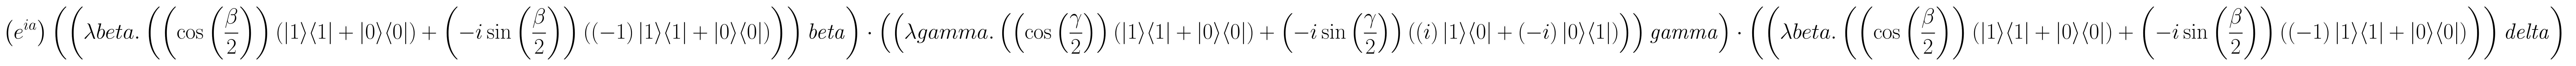

In [ ]:
# RHS - rotations
a = new_sub(parse(''' "Exp[I a]" SCRO ((Rz @ beta) MLTO (Ry @ gamma) MLTO (Rz @ delta)) '''))
a.render_tex()

== STEP 0 ==

apply BETA_REDUCTION: apply((λ beta.((
    beta
Cos[----]
     2
 . ((|1> ⊗ <1|) + (|0> ⊗ <0|))) + (
       beta
-I Sin[----]
        2
 . ((
-1
 . (|1> ⊗ <1|)) + (|0> ⊗ <0|))))), beta) -> ((
    beta
Cos[----]
     2
 . ((|1> ⊗ <1|) + (|0> ⊗ <0|))) + (
       beta
-I Sin[----]
        2
 . ((
-1
 . (|1> ⊗ <1|)) + (|0> ⊗ <0|))))
== STEP 1 ==

apply OPT_MUL_9: (((
    beta
Cos[----]
     2
 . ((|1> ⊗ <1|) + (|0> ⊗ <0|))) + (
       beta
-I Sin[----]
        2
 . ((
-1
 . (|1> ⊗ <1|)) + (|0> ⊗ <0|)))) · apply((λ gamma.((
    gamma
Cos[-----]
      2
 . ((|1> ⊗ <1|) + (|0> ⊗ <0|))) + (
       gamma
-I Sin[-----]
         2
 . ((
I
 . (|1> ⊗ <0|)) + (
-I
 . (|0> ⊗ <1|)))))), gamma)) -> (((
       beta
-I Sin[----]
        2
 . ((
-1
 . (|1> ⊗ <1|)) + (|0> ⊗ <0|))) · apply((λ gamma.((
    gamma
Cos[-----]
      2
 . ((|1> ⊗ <1|) + (|0> ⊗ <0|))) + (
       gamma
-I Sin[-----]
         2
 . ((
I
 . (|1> ⊗ <0|)) + (
-I
 . (|0> ⊗ <1|)))))), gamma)) + ((
    beta
Cos[----]
     2
 

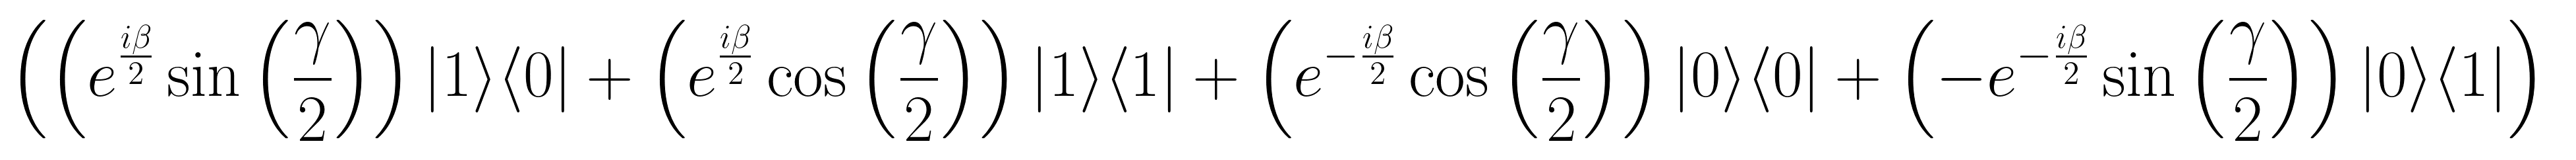

In [ ]:
trs.normalize(new_sub(parse(''' (Rz @ beta) MLTO (Ry @ gamma) ''')), verbose=True).render_tex()

In [ ]:
# LHS - U
b = new_sub(parse(''' ("Exp[I (a - beta/2 - delta/2)] Cos[gamma/2]" SCRO (ket0 OUTER bra0))
    ADDO ("- Exp[I (a - beta/2 + delta/2)] Sin[gamma/2]" SCRO (ket0 OUTER bra1)) 
    ADDO ("Exp[I (a + beta/2 - delta/2)] Sin[gamma/2]" SCRO (ket1 OUTER bra0))
    ADDO ("Exp[I (a + beta/2 + delta/2)] Cos[gamma/2]" SCRO (ket1 OUTER bra1))'''))

norm_a = trs.normalize(sub(a))
norm_b = trs.normalize(sub(b))
assert norm_a == norm_b


## Playground

In [4]:

# define the rotation gates
sub_rot = Subst({
    "Rzbeta" : sub(parse(''' ("Cos[beta/2]" SCRO I2) ADDO ("- Sin[beta/2] I" SCRO Z) ''')),
    "Rygamma" : sub(parse(''' ("Cos[gamma/2]" SCRO I2) ADDO ("- Sin[gamma/2] I" SCRO Y) ''')),
    "Rzdelta" : sub(parse(''' ("Cos[delta/2]" SCRO I2) ADDO ("- Sin[delta/2] I" SCRO Z) ''')),
})

# get the idempotent operation
new_sub = sub_rot.composite(sub).get_idempotent()

# RHS - rotations
a = new_sub(parse(''' "Exp[I a]" SCRO (Rzbeta MLTO Rygamma MLTO Rzdelta) '''))
# LHS - U
b = new_sub(parse(''' ("Exp[I (a - beta/2 - delta/2)] Cos[gamma/2]" SCRO (ket0 OUTER bra0))
    ADDO ("- Exp[I (a - beta/2 + delta/2)] Sin[gamma/2]" SCRO (ket0 OUTER bra1)) 
    ADDO ("Exp[I (a + beta/2 - delta/2)] Sin[gamma/2]" SCRO (ket1 OUTER bra0))
    ADDO ("Exp[I (a + beta/2 + delta/2)] Cos[gamma/2]" SCRO (ket1 OUTER bra1))'''))

norm_a = trs.normalize(sub(a), alg="outer_most")
norm_b = trs.normalize(sub(b), alg="outer_most")


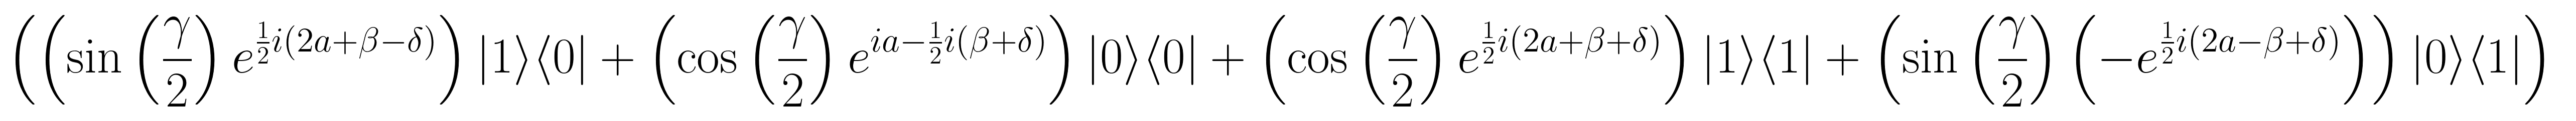

In [5]:
norm_a.render_tex()

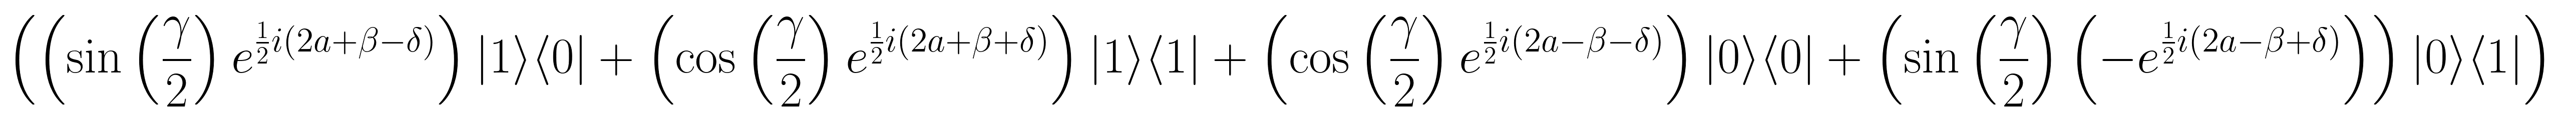

In [6]:
norm_b.render_tex()

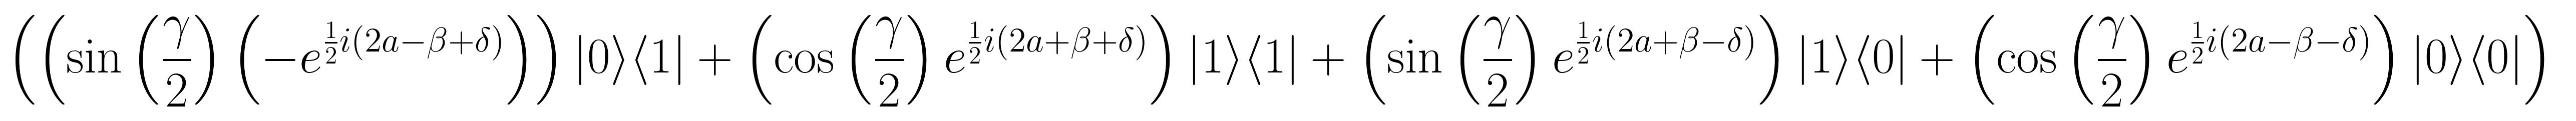

In [32]:
trs.normalize(sub(b), alg="outer_most").render_tex()

In [10]:
norm_a == norm_b

False

In [46]:
test = sub(parse(''' ("Exp[I a]" SCRO (ket0 OUTER bra1)) MLTO ("Exp[-1/2 I (beta + gamma)]" SCRO (ket1 OUTER bra0))'''))

Renaming rule variables...
== STEP 0 ==

apply OPT_MUL_7: ((
 I a
E
 . (|0> ⊗ <1|)) · (
 (-(1/2) I) (beta + gamma)
E
 . (|1> ⊗ <0|))) -> (
 I a
E
 . ((|0> ⊗ <1|) · (
 (-(1/2) I) (beta + gamma)
E
 . (|1> ⊗ <0|))))
== STEP 1 ==

apply OPT_MUL_5: ((|0> ⊗ <1|) · (
 (-(1/2) I) (beta + gamma)
E
 . (|1> ⊗ <0|))) -> (|0> ⊗ (<1| · (
 (-(1/2) I) (beta + gamma)
E
 . (|1> ⊗ <0|))))
== STEP 2 ==

apply BRA_MUL_4: (<1| · (
 (-(1/2) I) (beta + gamma)
E
 . (|1> ⊗ <0|))) -> (
 (-(1/2) I) (beta + gamma)
E
 . (<1| · (|1> ⊗ <0|)))
== STEP 3 ==

apply BRA_MUL_8: (<1| · (|1> ⊗ <0|)) -> ((<1| · |1>) . <0|)
== STEP 4 ==

apply SCR_DOT_7: (<1| · |1>) -> δ(1, 1)
== STEP 5 ==

apply DELTA_AST_1: δ(1, 1) -> 
1

== STEP 6 ==

apply BRA_SCAL_2: (
1
 . <0|) -> <0|
== STEP 7 ==

apply OPT_OUTER_4: (|0> ⊗ (
 (-(1/2) I) (beta + gamma)
E
 . <0|)) -> (
 (-(1/2) I) (beta + gamma)
E
 . (|0> ⊗ <0|))
== STEP 8 ==

apply OPT_SCAL_4: (
 I a
E
 . (
 (-(1/2) I) (beta + gamma)
E
 . (|0> ⊗ <0|))) -> ((
 I a
E
 × 
 (-(1/2) I) (beta

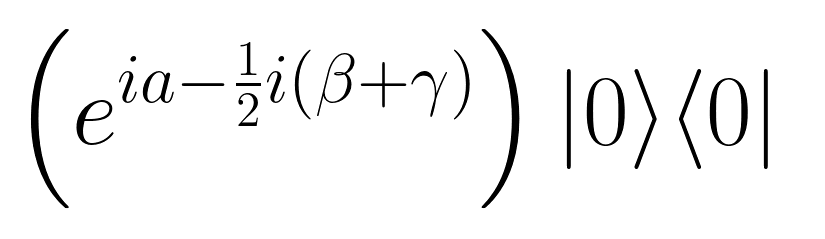

In [49]:
trs.normalize(test, verbose=True, alg="inner_most").render_tex()

Renaming rule variables...
== STEP 0 ==

apply OPT_MUL_7: ((
 I a
E
 . (|0> ⊗ <1|)) · (
 (-(1/2) I) (beta + gamma)
E
 . (|1> ⊗ <0|))) -> (
 I a
E
 . ((|0> ⊗ <1|) · (
 (-(1/2) I) (beta + gamma)
E
 . (|1> ⊗ <0|))))
== STEP 1 ==

apply OPT_MUL_5: ((|0> ⊗ <1|) · (
 (-(1/2) I) (beta + gamma)
E
 . (|1> ⊗ <0|))) -> (|0> ⊗ (<1| · (
 (-(1/2) I) (beta + gamma)
E
 . (|1> ⊗ <0|))))
== STEP 2 ==

apply BRA_MUL_4: (<1| · (
 (-(1/2) I) (beta + gamma)
E
 . (|1> ⊗ <0|))) -> (
 (-(1/2) I) (beta + gamma)
E
 . (<1| · (|1> ⊗ <0|)))
== STEP 3 ==

apply OPT_OUTER_4: (|0> ⊗ (
 (-(1/2) I) (beta + gamma)
E
 . (<1| · (|1> ⊗ <0|)))) -> (
 (-(1/2) I) (beta + gamma)
E
 . (|0> ⊗ (<1| · (|1> ⊗ <0|))))
== STEP 4 ==

apply OPT_SCAL_4: (
 I a
E
 . (
 (-(1/2) I) (beta + gamma)
E
 . (|0> ⊗ (<1| · (|1> ⊗ <0|))))) -> ((
 I a
E
 × 
 (-(1/2) I) (beta + gamma)
E
) . (|0> ⊗ (<1| · (|1> ⊗ <0|))))
== STEP 5 ==

apply SCR_COMPLEX_8: (
 I a
E
 × 
 (-(1/2) I) (beta + gamma)
E
) -> 
 I a - I/2 (beta + gamma)
E

== STEP 6 ==

apply BR

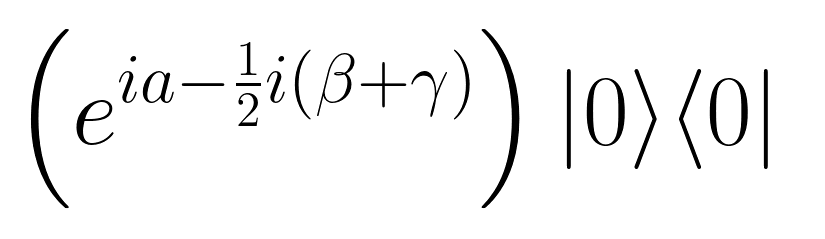

In [48]:
trs.normalize(test, verbose=True, alg="outer_most").render_tex()

In [31]:
session.evaluate(wl.FullSimplify(trs.normalize(test, alg="outer_most").simp_expr))

Power[E, Plus[Times[Complex[0, 1], Global`a], Times[Complex[0, Rational[-1, 2]], Plus[Global`beta, Global`gamma]]]]